In this assignment, you will work with one of the UCI datasets: 
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

### Objectives
 * Learn how to run clustering in python with different methods
 * Output and interpret clustering metrics
 * Experiment with PCA/data normalization of the dataset

On the example of wine, load the dataset and run the clustering algorithms on it.

---



In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

wine_dataset = load_wine()
data = wine_dataset.data
display(data)
n_samples, n_features = data.shape
n_clusters = len(np.unique(wine_dataset.target))
labels = wine_dataset.target

print("n_labels: %d, \t n_samples %d, \t n_features %d"
      % (n_clusters, n_samples, n_features))

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

n_labels: 3, 	 n_samples 178, 	 n_features 13


## Clustering Methods
Different clustering algorithms are listed in the [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html#id25). These are:

* K-Means
* Affinity Propagation
* Mean-Shift
* Spectral Clustering
* Ward Hierarchical Clustering
* Agglomerative Clustering
* DBSCAN
* Gaussian Mixtures
* Birch

Each has its own set of hyperparameters, criteria for determining clusters. In the interest of comparing them, I will discuss metrics and define the functions for benchmarking clustering models, so that the different methods can be compared in terms of their attained metrics on the UCI dataset. I will then also be able to plot the discovered clusters when the data is projected onto a lower number of dimensions using PCA.

In [0]:
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture

## Clustering Metrics
The [metrics relevant to clustering](http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation) are derived from information theory and probability theory, for the most part. When performing an in-depth analysis, it would be important to understand them enough to make an informed decision on how to evaluate models and determine which ones to deploy. For the purposes of this assignment, I will simply compare how the different clustering methods score, in the interest of practicing using the software library and understanding the patterns in the function interfaces. 

In [0]:
def bench_clustering(estimator, name, data, labels, verbose=True):
    t0 = time()
    
    # Run the algorithm
    estimator.fit(data)
    
    if hasattr(estimator, 'labels_'):
        labels_pred = estimator.labels_.astype(np.int)
    else:
        labels_pred = estimator.predict(data)
    
    homogeneity = metrics.homogeneity_score(labels, labels_pred)
    completeness = metrics.completeness_score(labels, labels_pred)
    v_measure = metrics.v_measure_score(labels, labels_pred)
    adjusted_rand = metrics.adjusted_rand_score(labels, labels_pred)
    
    # silhouette only defined if there are 2 or more clusters
    if len(np.unique(labels_pred)) >= 2:
        silhouette = metrics.silhouette_score(data, labels_pred, metric='euclidean', sample_size=300)
    else:
        silhouette = -1
    adjusted_mutual_info = metrics.adjusted_mutual_info_score(labels, labels_pred)  
    
    # Print metrics
    if verbose:
        print('Algorithm: {}\nTime: {:.3f}\nHomogeneity: {:.3f}\nCompleteness: {:.3f}\
        \nV-measure: {:.3f}\nAdjusted Rand-Index: {:.3f}\nSilhouette: {:.3f}\
        \nAdjusted Mutual Information: {:.3f}'.format(
            name,
            time()-t0, 
            homogeneity,
            completeness,
            v_measure,
            adjusted_rand,
            silhouette,
            adjusted_mutual_info
        ))
    
    return (homogeneity, completeness, v_measure, 
            adjusted_rand, silhouette, adjusted_mutual_info)

### Trying Different Clustering Algorithms
Since we already know there are 3 classes in the dataset, I will use this number for the models for which the expected number of clusters is a parameter.

In [0]:
n_clusters = 3

models = [KMeans(n_clusters=n_clusters), 
          AffinityPropagation(), 
          MeanShift(), 
          SpectralClustering(n_clusters=n_clusters), 
          AgglomerativeClustering(n_clusters=n_clusters), 
          DBSCAN(), 
          Birch(n_clusters=n_clusters),
          GaussianMixture(n_components=n_clusters)]

names = ["KMeans", "Affinity Propagation", "Mean Shift", "Spectral Clustering",
         "Agglomerative Clustering", "DBSCAN", "Birch", "Gaussian Mixture"]

In [7]:
for model, name in zip(models, names):
    bench_clustering(model, name, data, labels)
    print('\n')

Algorithm: KMeans
Time: 0.051
Homogeneity: 0.429
Completeness: 0.429        
V-measure: 0.429
Adjusted Rand-Index: 0.371
Silhouette: 0.571        
Adjusted Mutual Information: 0.423


Algorithm: Affinity Propagation
Time: 0.106
Homogeneity: 0.497
Completeness: 0.271        
V-measure: 0.351
Adjusted Rand-Index: 0.191
Silhouette: 0.537        
Adjusted Mutual Information: 0.255


Algorithm: Mean Shift
Time: 0.344
Homogeneity: 0.431
Completeness: 0.496        
V-measure: 0.461
Adjusted Rand-Index: 0.397
Silhouette: 0.502        
Adjusted Mutual Information: 0.425


Algorithm: Spectral Clustering
Time: 0.288
Homogeneity: 0.023
Completeness: 0.205        
V-measure: 0.042
Adjusted Rand-Index: 0.001
Silhouette: -0.283        
Adjusted Mutual Information: 0.010


Algorithm: Agglomerative Clustering
Time: 0.014
Homogeneity: 0.416
Completeness: 0.416        
V-measure: 0.416
Adjusted Rand-Index: 0.368
Silhouette: 0.564        
Adjusted Mutual Information: 0.410


Algorithm: DBSCAN
Time: 0.011


## PCA / Data Normalization

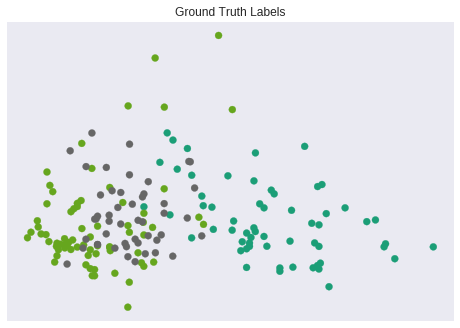

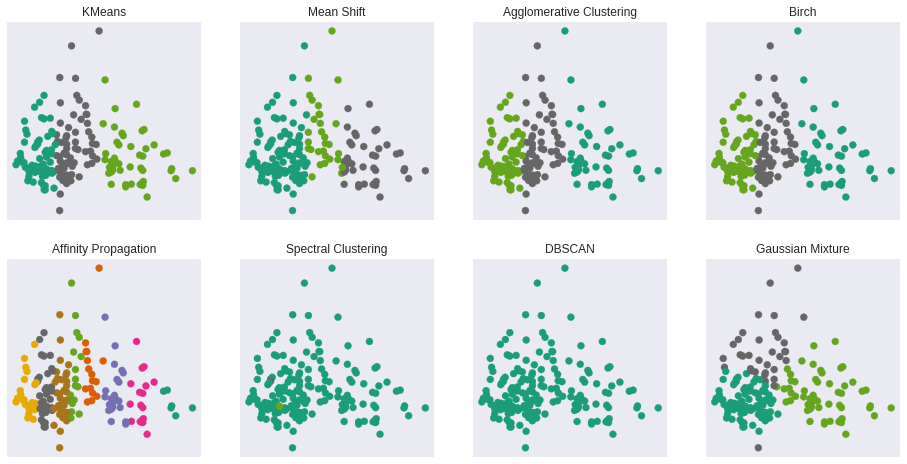

In [20]:
data_pca = PCA(2).fit_transform(data)

fig0 = plt.figure()
ax = fig0.add_subplot(111)
ax.scatter(*data_pca.T, c=labels, cmap='Dark2')
ax.set(title='Ground Truth Labels', xticks=(), yticks=())

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for estimator, name, ix in zip(models, names, range(len(models))):
    estimator.fit(data_pca)
    
    if hasattr(estimator, 'labels_'):
        labels_pred = estimator.labels_.astype(np.int)
    else:
        labels_pred = estimator.predict(data_pca)
    
    axes[ix%2, ix//2].scatter(*data_pca.T, c=labels_pred, cmap='Dark2')
    axes[ix%2, ix//2].set(title=name, xticks=(), yticks=())

### Normalized Data

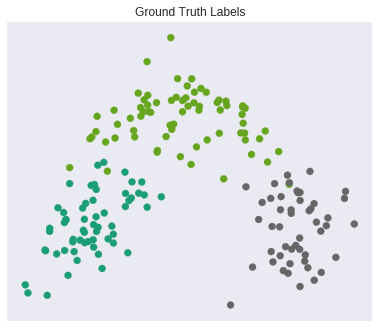

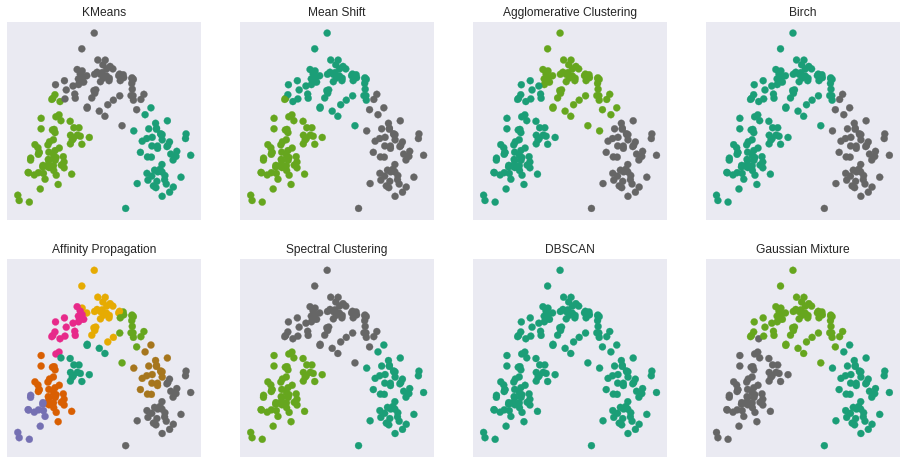

In [9]:
data_normalized = MinMaxScaler().fit_transform(data)
data_normalized_pca = PCA(2).fit_transform(data_normalized)

fig0 = plt.figure()
ax = fig0.add_subplot(111)
ax.scatter(*data_normalized_pca.T, c=labels, cmap='Dark2')
ax.set(title='Ground Truth Labels', xticks=(), yticks=())
ax.set_aspect(1)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for estimator, name, ix in zip(models, names, range(len(models))):
    estimator.fit(data_normalized_pca)
    
    if hasattr(estimator, 'labels_'):
        labels_pred = estimator.labels_.astype(np.int)
    else:
        labels_pred = estimator.predict(data_normalized_pca)
    
    axes[ix%2, ix//2].scatter(*data_normalized_pca.T, c=labels_pred, cmap='Dark2')
    axes[ix%2, ix//2].set(title=name, xticks=(), yticks=())